In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
df = pd.read_csv(r'/kaggle/input/iris/Iris.csv')
# df = pd.read_csv(r'C:\Users\Aryan\Desktop\Data Science\dataset\Iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df=df.drop(columns=["Id"])

In [5]:
X = df.drop(columns=['Species'])
y = df['Species']

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


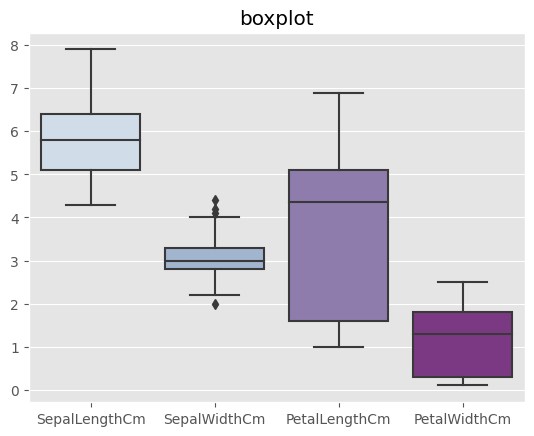

In [7]:
sns.boxplot(data = df, palette = 'BuPu')
plt.title('boxplot')
plt.show()
#turkey box plot: whiskers are based on IQR; lower_whisker = Q1 - 1.5 * IQR, upper_whisker = Q3 + 1.5 * IQR

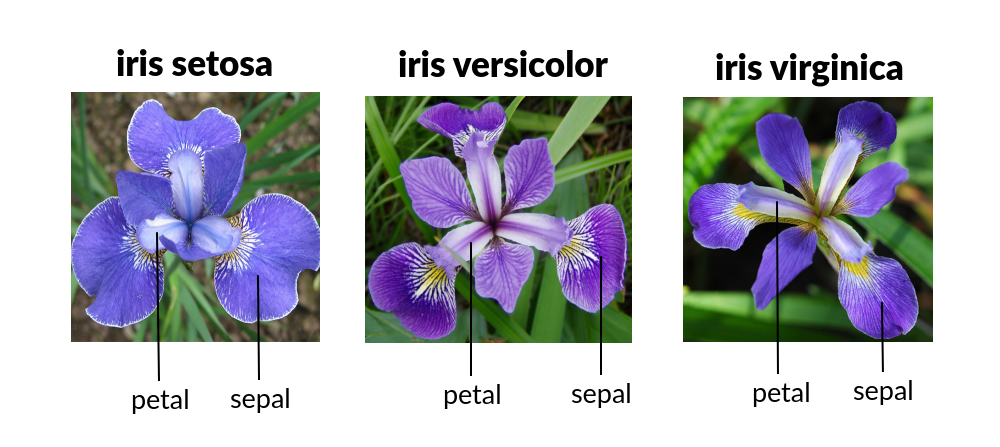

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<function matplotlib.pyplot.show(close=None, block=None)>

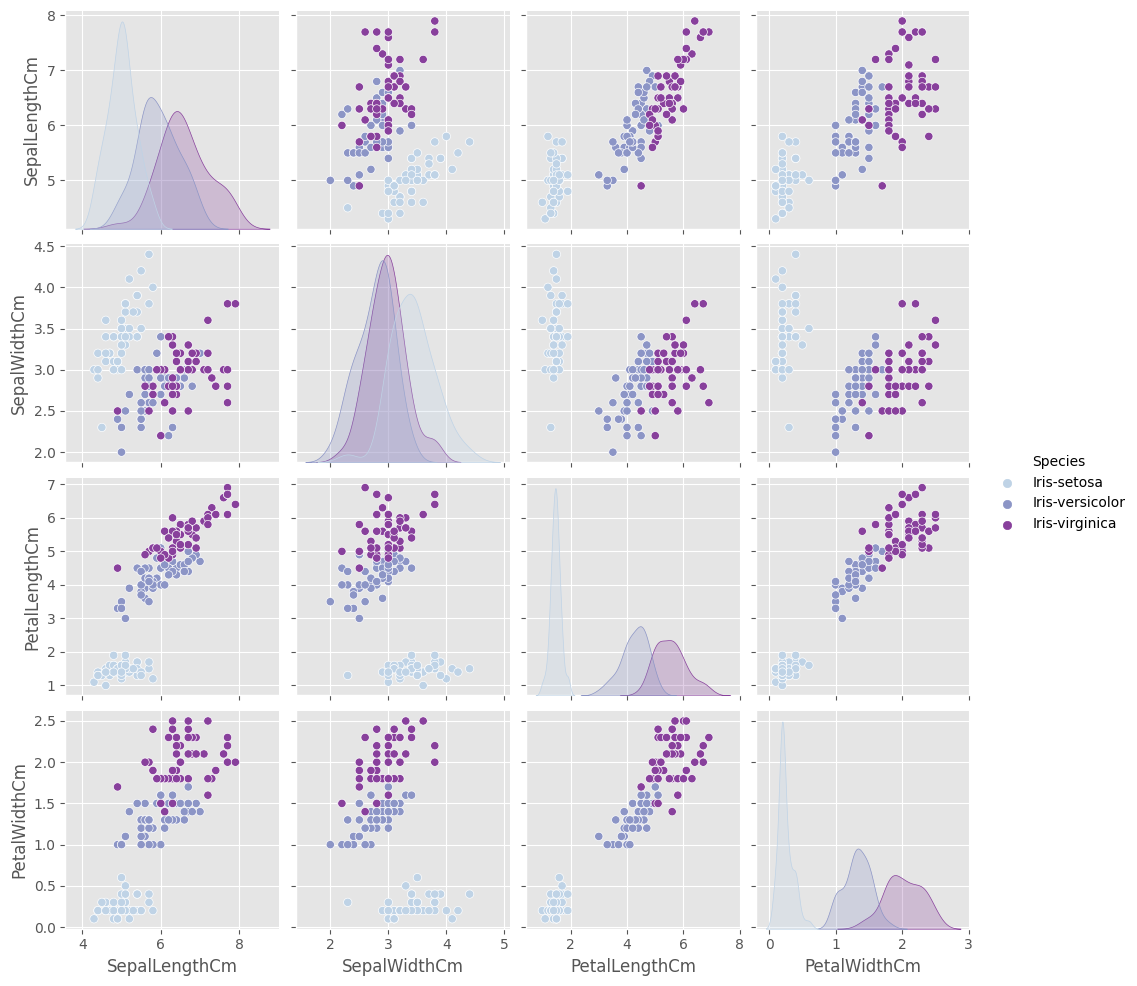

In [8]:
sns.pairplot(data = df,hue = 'Species', palette = 'BuPu')
plt.show

The first diagonal cell is: distribution of SepalLengthCm <br>
Second diagonal cell: distribution of SepalWidthCm <br>
Third diagonal cell: distribution of PetalLengthCm <br>
Fourth diagonal cell: distribution of PetalWidthCm <br>
Each one shows how values are spread for each species. <br>
<Br>
**what can be interpreted from this?** <br>
(A) Petal-based features separate the species almost perfectly.<br>
(B) Sepal features overlap heavily, especially for versicolor vs virginica.<br>
(C) Setosa is distinctly smaller in petals and slightly wider in sepals.<br>
(D) Virginica has the largest petals and the highest variability.<br>
(E) PetalLength and PetalWidth are highly correlated across species.<br>
(F) SepalWidth shows the weakest predictive power/highest noise.<br>
(G) The dataset is almost linearly separable in petal space.

<Axes: >

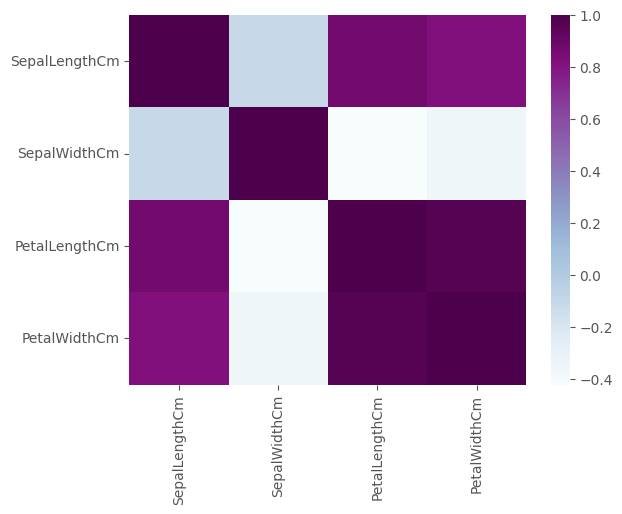

In [9]:
sns.heatmap(df.corr(numeric_only="True"), cmap='BuPu')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18, random_state=32)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier(random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)
print("\nTest accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test accuracy: 0.963

Classification report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.97      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27



In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = lr.predict(X_test)
model.score(X_test, y_test)
print("\nTest accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test accuracy: 1.0

Classification report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [19]:
print("confisuon matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: \n", accuracy_score(y_pred, y_test))
print("classification report: \n", classification_report(y_pred, y_test))

confisuon matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0  7]]
accuracy score: 
 0.9629629629629629
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93         7

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

